## task description

Test if ASoC-gene pairs that are connected by Hi-C contacts (Hi-C pairs) have a higher proportion of eqtl-gene fraction compared to all snp-gene within 500kb distance.

use CMC data to define eqtl-gene.

In [87]:
import csv
import pybedtools
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [45]:
dista = 500000
snpf = '/home/simingz/neuron_atac_seq/eQTL/CN_20_ASoC_FDR0.05.bed.chrpos.hg19'
hicbedf = 'CN.hic.bed'
annof ='genecode.v29lift37.genes'
eqtlf = '/home/simingz/neuron_atac_seq/eQTL/CMC_MSSM-Penn-Pitt_DLPFC_mRNA_eQTL-adjustedSVA.txt'

In [38]:
# snp-gene pairs (defined based on distance)
snp = []
with open(snpf, 'r') as f:
    csv_reader = csv.reader(f)
    next(csv_reader)
    for row in csv_reader:
        snp.append('chr' + row[0])
        
snpb = []
for s in snp:
    chrom = s.split(":")[0]
    pos = int(s.split(":")[1])
    bedstart = max(int(pos - dista - 1),int(0))
    bedend = int(pos + dista)
    snpb.append([chrom, bedstart, bedend])
print("Number of SNPs: " + str(len(snpb)))

snpbed = pybedtools.BedTool(snpb)
annobed = pybedtools.BedTool(annof)
snpgene = snpbed.intersect(annobed, wo=True)
snpgene0 = []
for i in snpgene:
    i.start = i.end - dista - 1 
    i.end = i.end - dista
    snpgene0.append(i)
snpgene0 = pybedtools.BedTool(snpgene0)
print("Number of SNP-gene pairs: " + str(len(snpgene0)))

snpgenep = [i[0] + ":" + i[2] + '-' + i[7].split('.')[0] for i in snpgene0] # chrom:pos-gene
snpgenep = set(snpgenep)

Number of SNPs: 5610
Number of SNP-gene pairs: 156253


In [43]:
# HiC pairs
hicbed = pybedtools.BedTool(hicbedf)
hicp0 = [i[0] + ":" + i[2] + '-' + i[11].split('.')[0] for i in hicbed] # chrom:pos-gene
hicp = set(hicp0)
print("Number of HiC pairs: " + str(len(hicp)))

Number of HiC pairs: 883


In [46]:
# eqtl
eqtl = []
with open(eqtlf, 'r') as f:
    csv_reader = csv.reader(f, delimiter = ' ')
    next(csv_reader)
    for row in csv_reader:
        try:
            eqtl.append('-'.join([row[7], row[1]])) # 'chrx:xx-gene'
        except IndexError:
            print(row)
eqtl = set(eqtl)

In [73]:
eqtldis = []
with open(eqtlf, 'r') as f:
    csv_reader = csv.reader(f, delimiter = ' ')
    next(csv_reader)
    for row in csv_reader:
        if row[13] != 'trans':
            try:
                eqtldis.append(abs(int(row[7].split(":")[1]) - int(row[11].split(":")[1].split("..")[0]))) # 'chrx:xx-gene'
            except IndexError:
                print(row)


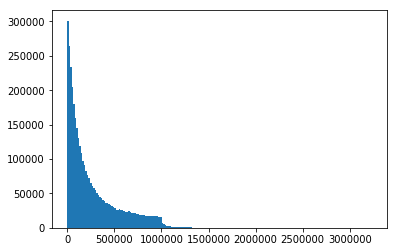

In [76]:
a = plt.hist(eqtldis,200)

In [114]:
hicdis = []
with open('Neu.50000_blocks.bed', 'r') as f:
    csv_reader = csv.reader(f, delimiter = '\t')
    for row in csv_reader:
        try:
            hicdis.append(abs(int(row[2])-int(row[1])))
        except IndexError:
            print(row)

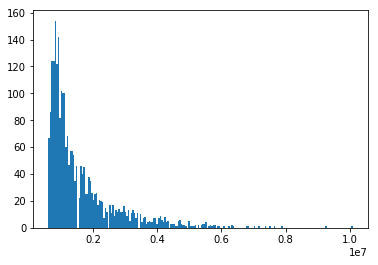

In [115]:
b=plt.hist(hicdis,200)

In [116]:
a = np.array(hicdis)

In [118]:
np.average(a)

1592594.0594059406

In [93]:
len(a)

2525